<a href="https://colab.research.google.com/github/anshupandey/Reinforcement-Learning/blob/main/Code_RL_Q_Learning_with_Frozen_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reinforcement Learning 

Temporal Difference and Q Learning

##Objectives
***

* Q-Learning in Reinforcement Learning

###Q-Learning
***

Q-learning is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. It does not require a model of the environment (hence "model-free"), and it can handle problems with stochastic transitions and rewards without requiring adaptations.

SARSA is on-policy: the Q function we are using is the Q function we are using in the environment

Q-Learning is off-policy: actions are dictated by the epsilon-greedy policy, but we are learning the Q function for the greedy policy. 

The behaviour policy dictates how we act in the environment.

The target policy is the policy we are learning. 

Q-Learning is a basic form of Reinforcement Learning which uses Q-values (also called action values) to iteratively improve the behavior of the learning agent.

**Q-Values or Action-Values:** Q-values are defined for states and actions. Q(S, A) is an estimation of how good is it to take the action A at the state S. This estimation of Q(S, A) will be iteratively computed using the TD- Update rule which we will see in the upcoming sections.

**Rewards and Episodes:** An agent over the course of its lifetime starts from a start state, makes a number of transitions from its current state to a next state based on its choice of action and also the environment the agent is interacting in. At every step of transition, the agent from a state takes an action, observes a reward from the environment, and then transits to another state. If at any point of time the agent ends up in one of the terminating states that means there are no further transition possible. This is said to be the completion of an episode.

**Temporal Difference or TD-Update:** The Temporal Difference or TD-Update rule can be represented as follows 

image.png

Now with all the theory required in hand let us take an example. We will use OpenAI’s gym environment to train our Q-Learning model.

Command to Install gym –

  S : Current State of the agent.
  
  A : Current Action Picked according to some policy.
  
  S' : Next State where the agent ends up.
  
  A' : Next best action to be picked using current Q-value estimation, i.e. pick the action with the maximum Q-value in the next state.
  
  R : Current Reward observed from the environment in Response of current action.
  
  $\gamma$(>0 and <=1) : Discounting Factor for Future Rewards. Future rewards are less valuable than current rewards so they must be discounted. Since Q-value is an estimation of expected rewards from a state, discounting rule applies here as well.
  
  $\alpha$ : Step length taken to update the estimation of Q(S, A).

A Q-table or matrix is created while performing the Q-learning. The table follows the state and action pair, i.e., [s, a], and initializes the values to zero. After each action, the table is updated, and the q-values are stored within the table.

The RL agent uses this Q-table as a reference table to select the best action based on the q-values. 

Here, we will use the FrozenLake environment of the gym python library which provides many environments including Atari games and CartPole.

FrozenLake environment consists of a 4 by 4 grid representing a surface. The agent always starts from the state 0, [0,0] in the grid, and his goal is to reach the state 16, [4,4] in the grid. On his way, he could find some frozen surfaces or fall in a hole. If he falls, the episode is ended. When the agent reaches the goal, the reward is equal to one. Otherwise, it is equal to 0.


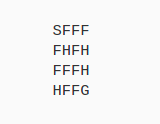

Frozen Lake Grid

First, we import the needed libraries. Numpy for accessing and updating the Q-table and gym to use the FrozenLake environment.

In [ ]:
import numpy as np
import gym

Then, we instantiate our environment and get its sizes.

In [ ]:
env = gym.make("FrozenLake-v0")
n_observations = env.observation_space.n
n_actions = env.action_space.n

We need to create and initialize the Q-table to 0.

In [ ]:
#Initialize the Q-table to 0
Q_table = np.zeros((n_observations,n_actions))
print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


We define the different parameters and hyperparameters 

In [ ]:
#number of episode we will run
n_episodes = 10000

#maximum of iteration per episode
max_iter_episode = 100

#initialize the exploration probability to 1
exploration_proba = 1

#exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.001

# minimum of exploration proba
min_exploration_proba = 0.01

#discounted factor
gamma = 0.99

#learning rate
lr = 0.1

To evaluate the agent training, we will store the total rewards he gets from the environment after each episode in a list that we will use after the training is finished.

In [ ]:
total_rewards_episode = list()

Now let’s write the main loop where all the process will happen

In [ ]:
rewards_per_episode=[]

#we iterate over episodes
for e in range(n_episodes):
    #we initialize the first state of the episode
    current_state = env.reset()
    done = False
    #sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    for i in range(max_iter_episode): 
        # we sample a float from a uniform distribution over 0 and 1
        # if the sampled flaot is less than the exploration proba
        #     the agent selects arandom action
        # else
        #     he exploits his knowledge using the bellman equation 
        
        if np.random.uniform(0,1) < exploration_proba:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[current_state,:])
        
        # The environment runs the chosen action and returns
        # the next state, a reward and true if the epiosed is ended.
        next_state, reward, done, _ = env.step(action)
        
        # We update our Q-table using the Q-learning iteration
        Q_table[current_state, action] = (1-lr) * Q_table[current_state, action] +lr*(reward + gamma*max(Q_table[next_state,:]))
        total_episode_reward = total_episode_reward + reward
        # If the episode is finished, we leave the for loop
        if done:
            break
        current_state = next_state
    #We update the exploration proba using exponential decay formula 
    exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
    rewards_per_episode.append(total_episode_reward)

Once our agent is trained, we will test his performance using the rewards per episode list. We will do that by evaluating his performance every 1000 episodes.

In [ ]:
print("Mean reward per thousand episodes")
for i in range(10):
  print((i+1)*1000, " : mean espiode reward: ", np.mean(rewards_per_episode[1000*i:1000*(i+1)])) 

Mean reward per thousand episodes
1000  : mean espiode reward:  0.019
2000  : mean espiode reward:  0.19
3000  : mean espiode reward:  0.443
4000  : mean espiode reward:  0.57
5000  : mean espiode reward:  0.657
6000  : mean espiode reward:  0.667
7000  : mean espiode reward:  0.673
8000  : mean espiode reward:  0.691
9000  : mean espiode reward:  0.694
10000  : mean espiode reward:  0.689


As we can notice, the performance of the agent is very bad in the beginning but he improved his efficiency through training.

Q-learning algorithm is a very efficient way for an agent to learn how the environment works.

##Thank You !